**Etape 1: Chargement des données**



In [1]:
source <- "Data B6.txt"
sp.data <- read.table(source)
sp.ts <- ts(sp.data, start = c(2002, 1), end = c(2021, 1), freq = 12)
print(sp.ts, calender = T)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2002 17504 16704 19833 21106 22228 21666 22981 23131 21378 22265 20887 20936
2003 21204 20852 23872 22829 23293 22801 23994 24965 23400 23645 21946 22386
2004 22773 22554 25602 26207 28578 28403 29286 28729 27351 29544 27676 27303
2005 25566 24982 29380 30549 31151 31862 33888 36204 36260 36557 31260 31264
2006 30800 29253 33887 36002 39016 39126 40585 41051 34830 33208 31556 32662
2007 30922 29762 35603 36677 41378 40481 40696 40387 37675 39425 39802 39014
2008 38690 37616 42226 43663 48512 50085 51728 49068 45182 40625 29869 26375
2009 26541 25620 28450 29437 32958 35945 36339 36980 34348 35025 34342 35249
2010 34145 31888 37234 38297 39168 38208 39054 38541 37170 38480 37073 39091
2011 38018 36669 44349 45853 48245 47514 48200 48320 45443 45115 42976 42755
2012 41406 42218 48397 47664 49198 46483 46658 50195 47201 48983 44434 42582
2013 41762 42229 47730 46815 49195 48486 49825 49563 46072 46517 42397 43172

Etape 2: Exploration graphique des données ET Analyse du graphe et de l'arc


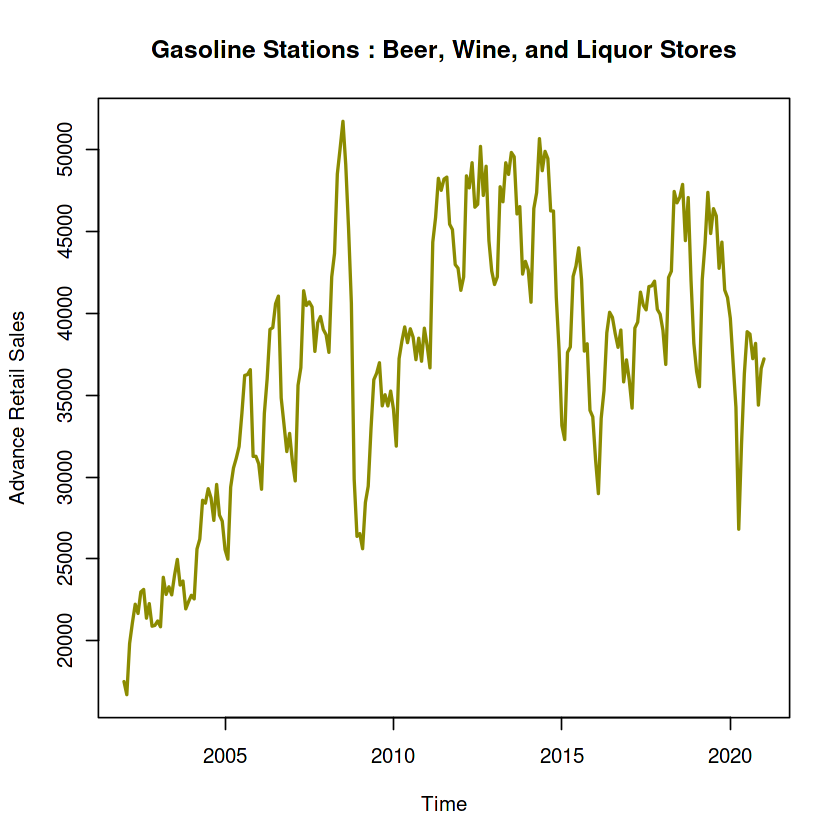

In [2]:
 plot(sp.ts, xlab="Time", ylab="Advance Retail Sales",
     main="Gasoline Stations ",
     col="yellow4",lwd=2)

`A travers la représentation graphique des données, on remarque l'abscence de tendance et de saisonnalité . Pour s'assurer de ce qu'on a observé, on examine la fonction d'autocorrelation acf.`



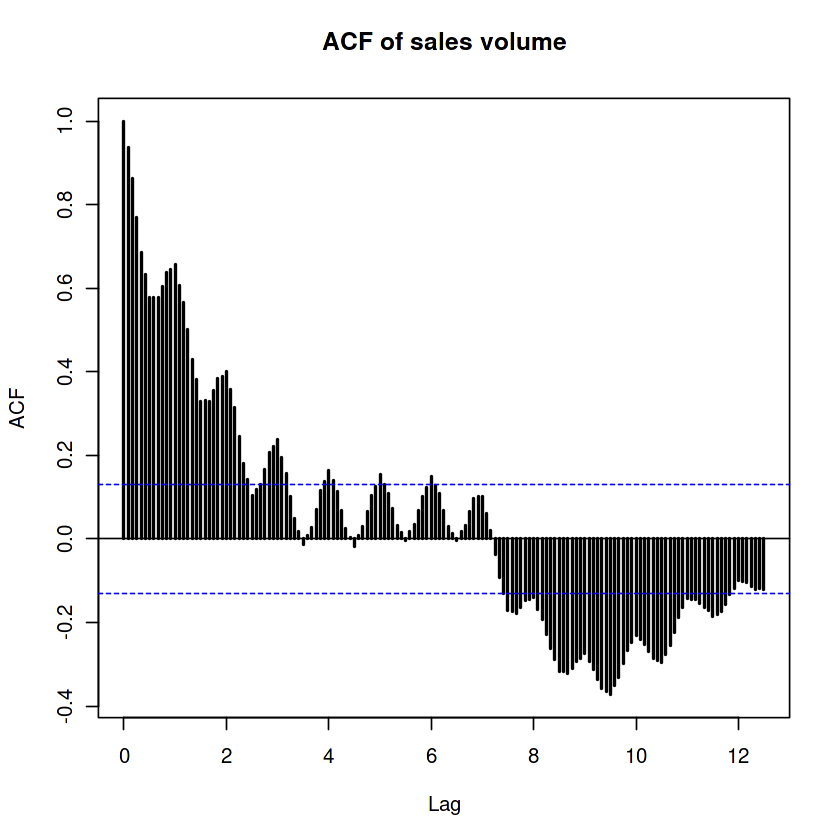

In [7]:
 acf(sp.ts,lag=150,main="ACF of sales volume",lwd=2)

`L'acf est d'une décroissance de vitesse variante (c'est une decroissance rapide)  ce qui confirme notre hypothèse d'abscence de tendance et de comportement répétitif amorti ce qui nous informe sur l'abscence de saisonnalité.`



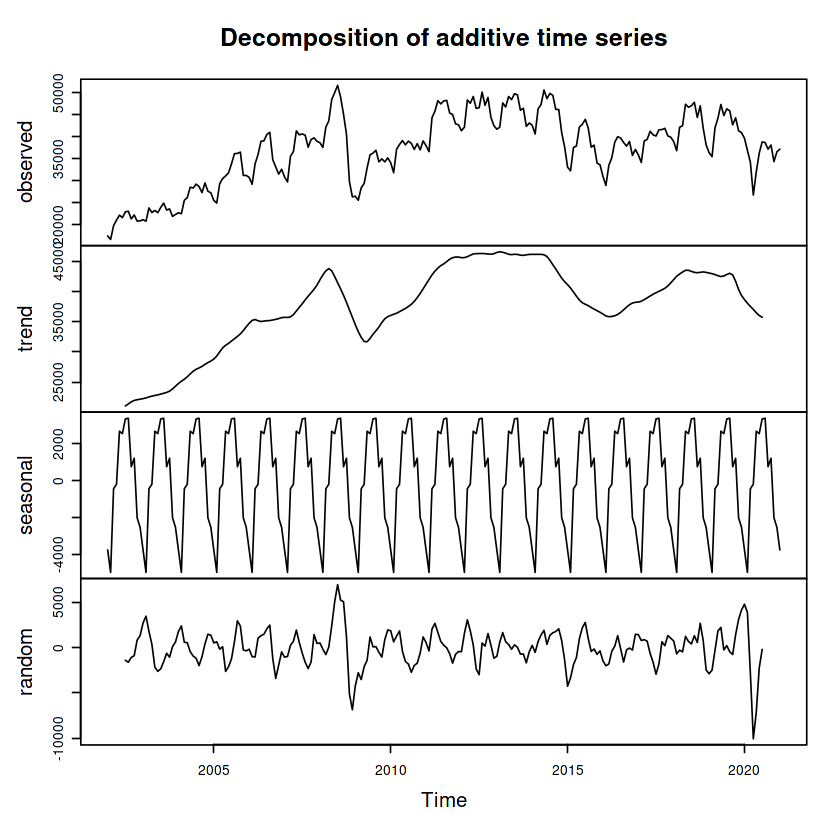

In [8]:
plot(decompose(sp.ts,type=c("additive")))

La sortie de la fonction decompose par rapport au trend \(via une moyenne mobile\) nous pousse Qu'on aller directement à la modélisation ARMA car la ST est vue en tant que processus purement aléatoire et on n'a pas pu detecter une tendance et une saisonnalité déterministes


**Etape 3: Ajustement**



`Ajustement impossible` puisque on a pas detecté ni saisonnalité  ni trend. 


**`Etape 4: Test de stationarité`**



In [11]:
install.packages('tseries') 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in install.packages("tseries"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("tseries"): unable to install packages


In [16]:
source <- "Data B6.txt"
sp.data <- read.table(source)
cp <-  ts(sp.data, start = c(2002, 1), end = c(2021, 1), freq = 12)
library(tseries)
adf.test(cp)


	Augmented Dickey-Fuller Test

data:  cp
Dickey-Fuller = -2.0037, Lag order = 6, p-value = 0.5744
alternative hypothesis: stationary


La p\_value est 0.5744 &gt; 0.05 donc La stationnarité n'est pas assurée alors on applique des différentiations autant de fois que nécessaire pour stationnariser la série et revenir au premier point.


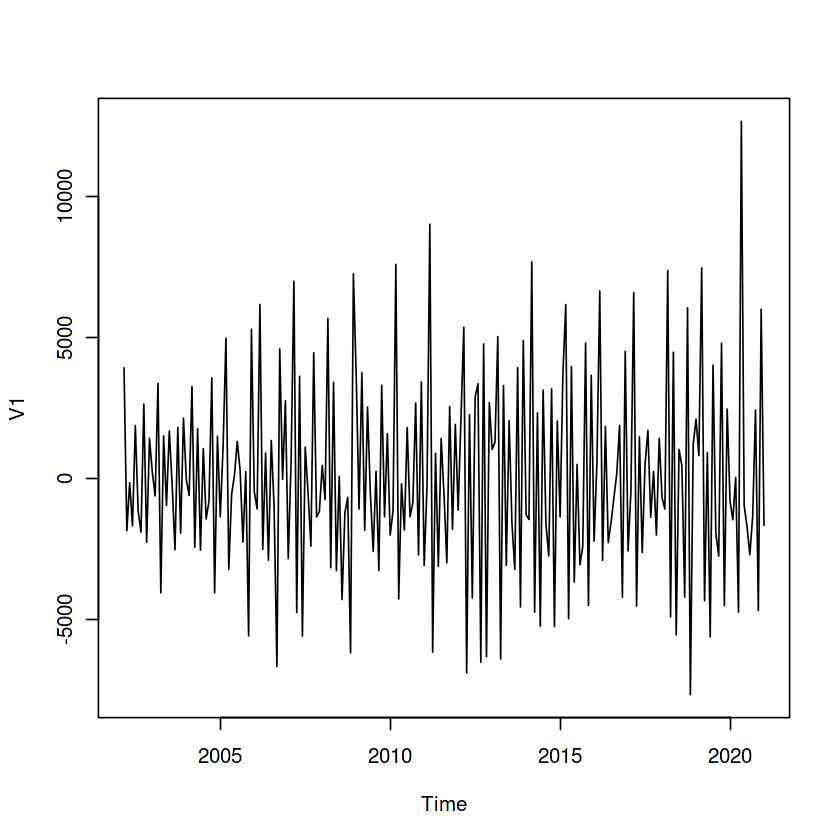

In [14]:
sp.ts_With_diff <- diff(cp, differences=2)
plot.ts(sp.ts_With_diff)

In [15]:
library(tseries)
adf.test(sp.ts_With_diff, alternative="stationary")

Warning message in adf.test(sp.ts_With_diff, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  sp.ts_With_diff
Dickey-Fuller = -8.5215, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


La p\_value est 0.01&lt;0.05 donc on accepte l'hypothèse alternative : les données différenciées sont stationnaire. On passe au Test de blancheur :On teste si la nouvelle variable "sp.ts\_With\_diff" est bien un bruit blanc ou pas \(Si elle ne coresspondent pas à un bruit blanc, on passe à la modélisation par un modèle ARMA\). Pour ce faire, on peut procéder de deux façons différentes :

Tracer l'acf et vérifier l'absence d'autocorrélation.Appliquer le test de Box\-Pierce via la commande Box.test\(\).




	Box-Pierce test

data:  sp.ts_With_diff
X-squared = 73.66, df = 1, p-value < 2.2e-16


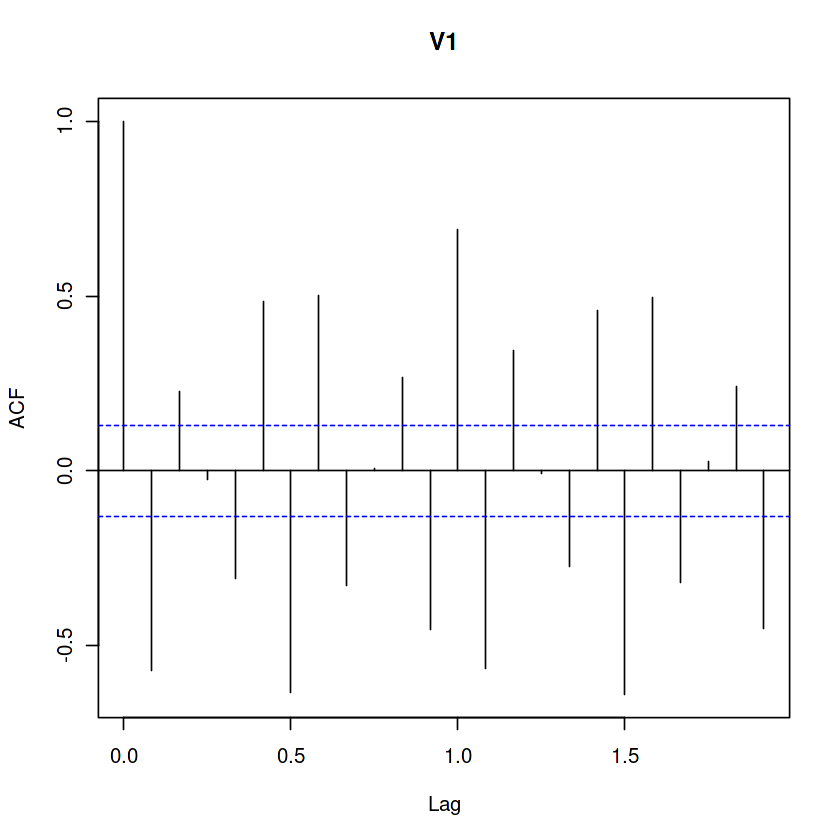

In [17]:
acf(sp.ts_With_diff)
Box.test(sp.ts_With_diff)

L'acf indique bien la présence d'autocorrélation et le test de Box\-Pierce indique également à travers la valeurs de la p\_value = 0.00000000000000022 &lt; 0.05 que l'hypothèse alternative est considérée : le bruit n'est pas [blanc.Il](http://blanc.Il) faut passer maintenant à modéliser les données stationnaires résultantes par un modèle ARMA.



**Etape 5: Application du modèle ARMA**



Model ARIMA:   ARIMA\( data, c\(p,d,q\)\)

avec: 

p = le point limite du PACF

q = le point limite de l'ACF

d = niveau de differentiation 


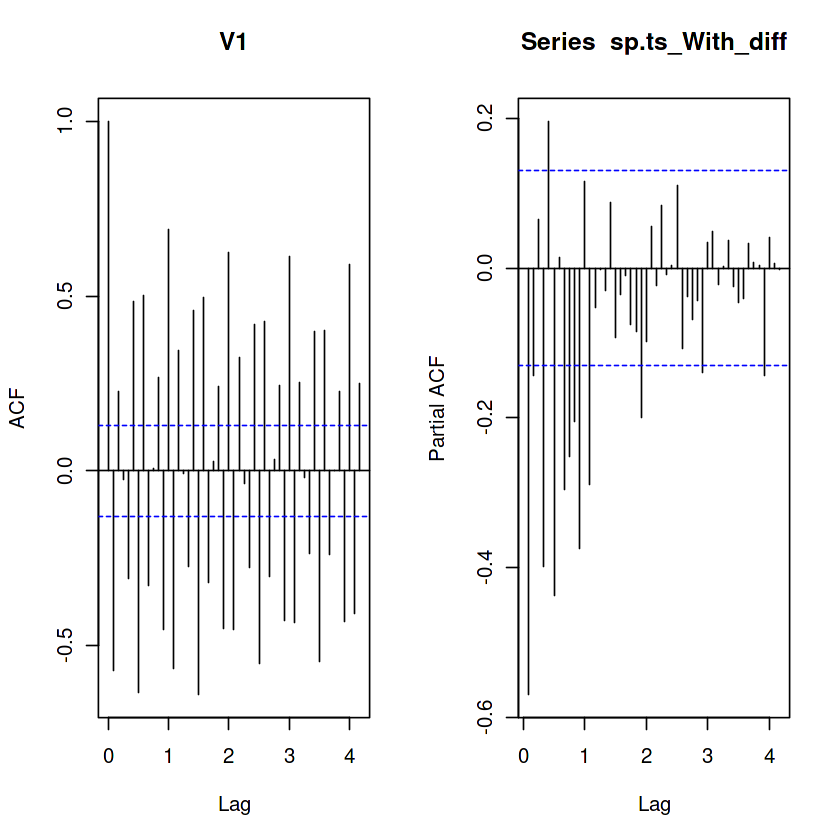

In [18]:
 par(mfrow=c(1,2))
acf(sp.ts_With_diff,50)
pacf(sp.ts_With_diff,50)

In [21]:
source <- "Data B6.txt"
sp.data <- read.table(source)
cp <-  ts(sp.data, start = c(2002, 1), end = c(2021, 1), freq = 12)
library(forecast)
ARMA=auto.arima(cp)
ARMA

Series: cp 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
         ma1     sma1
      0.4501  -0.8727
s.e.  0.0628   0.0590

sigma^2 = 2541028:  log likelihood = -1906.96
AIC=3819.92   AICc=3820.03   BIC=3830.04

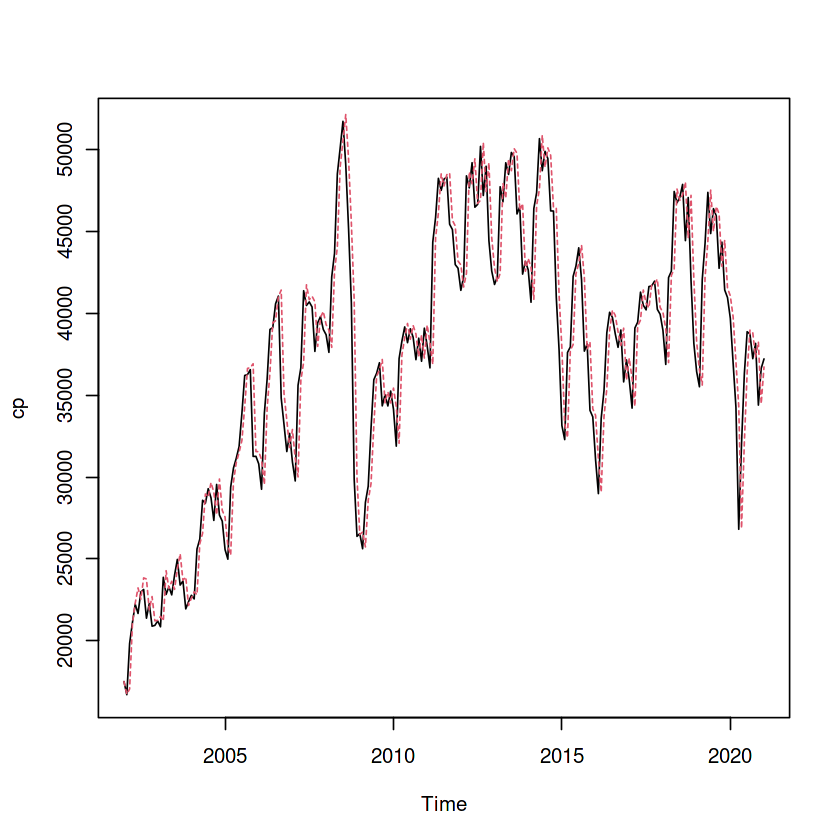

In [23]:
source <- "Data B6.txt"
sp.data <- read.table(source)
cp <-  ts(sp.data, start = c(2002, 1), end = c(2021, 1), freq = 12)
res <- arima(cp, order = c(0,2,1))
ts.plot(cp)
res_with_o_residual <- cp - residuals(res)
points(res_with_o_residual, type = "l", col = 2, lty = 2)

Après avoir formé le modèle, nous ferons une prédiction de 5 mois via la commande forecast\(\) de la librairie "forecast"



In [18]:
library("forecast")
res_Forcasted <- forecast(res, h=5)
res_Forcasted

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Apr 2021       22405.34 18822.66 25988.02 16926.10 27884.57
May 2021       22424.68 17347.99 27501.36 14660.56 30188.79
Jun 2021       22444.01 16214.14 28673.88 12916.25 31971.78
Jul 2021       22463.35 15255.62 29671.08 11440.08 33486.63
Aug 2021       22482.69 14408.47 30556.91 10134.24 34831.14